### Title of Project: Heart Disease Prediction

`Author of notebook:` [Usman Khan](https://github.com/UsmanK7)\
`Date: ` 31 Jan 2025 \
`Dataset used: ` [Heart Disease UCI](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data)


# Meta Data

## Context
This is a multivariate type of dataset, meaning it provides or involves a variety of separate mathematical or statistical variables for multivariate numerical data analysis. It is composed of 14 attributes:

- Age  
- Sex  
- Chest pain type  
- Resting blood pressure  
- Serum cholesterol  
- Fasting blood sugar  
- Resting electrocardiographic results  
- Maximum heart rate achieved  
- Exercise-induced angina  
- Oldpeak — ST depression induced by exercise relative to rest  
- Slope of the peak exercise ST segment  
- Number of major vessels  
- Thalassemia  

This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date.  

One of the major tasks for this dataset is to predict whether a given patient has heart disease based on the provided attributes. Another experimental task is to diagnose and find insights from the dataset that can help in understanding heart disease better.

## Content

### Column Descriptions:

- **id**: Unique ID for each patient  
- **age**: Age of the patient in years  
- **origin**: Place of study  
- **sex**: Male/Female  
- **cp**: Chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])  
- **trestbps**: Resting blood pressure (in mm Hg on admission to the hospital)  
- **chol**: Serum cholesterol in mg/dl  
- **fbs**: If fasting blood sugar > 120 mg/dl  
- **restecg**: Resting electrocardiographic results  
  - Values: [normal, ST-T abnormality, left ventricular hypertrophy]  
- **thalach**: Maximum heart rate achieved  
- **exang**: Exercise-induced angina (True/False)  
- **oldpeak**: ST depression induced by exercise relative to rest  
- **slope**: Slope of the peak exercise ST segment  
- **ca**: Number of major vessels (0-3) colored by fluoroscopy  
- **thal**: [normal, fixed defect, reversible defect]  
- **num**: The predicted attribute (presence of heart disease)  

### Acknowledgements

#### Creators:
- **Hungarian Institute of Cardiology, Budapest**: Andras Janosi, M.D.  
- **University Hospital, Zurich, Switzerland**: William Steinbrunn, M.D.  
- **University Hospital, Basel, Switzerland**: Matthias Pfisterer, M.D.  
- **V.A. Medical Center, Long Beach and Cleveland Clinic Foundation**: Robert Detrano, M.D., Ph.D.  

#### Relevant Papers:
- Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989).  
  *International application of a new probability algorithm for the diagnosis of coronary artery disease.*  
  American Journal of Cardiology, 64, 304–310.  

- **David W. Aha & Dennis Kibler**  
  *Instance-based prediction of heart-disease presence with the Cleveland database.*  

- Gennari, J.H., Langley, P., & Fisher, D. (1989).  
  *Models of incremental concept formation.*  
  Artificial Intelligence, 40, 11–61.  

#### Citation Request
The authors of the dataset have requested that any publications resulting from the use of the data include the names of the principal investigators responsible for data collection at each institution:

- **Hungarian Institute of Cardiology, Budapest**: Andras Janosi, M.D.  
- **University Hospital, Zurich, Switzerland**: William Steinbrunn, M.D.  
- **University Hospital, Basel, Switzerland**: Matthias Pfisterer, M.D.  
- **V.A. Medical Center, Long Beach and Cleveland Clinic Foundation**: Robert Detrano, M.D., Ph.D.  


## Aims and Objectives:

### Import libraries
Let's start the project by import the necessary libraries required for data manipulation, visualization, and machine learning.


In [84]:
# import libraries

# data manipulation
import pandas as pd
import numpy as np
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data preprocessing
from sklearn.preprocessing import LabelEncoder
# data scaling
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# data imputation
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, r2_score, root_mean_squared_error
# data splitting
from sklearn.experimental import enable_iterative_imputer
# data modeling
from sklearn.impute import IterativeImputer
# data evaluation
from sklearn.model_selection import train_test_split

### Load the Dataset
In this section, we will load the heart disease dataset into a pandas DataFrame for further analysis and processing.

In [85]:
# load the dataset from the csv file using pandas
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Exploratory Data Analysis (Eda)
Here we will explore each column

In [86]:
# Expolaring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [87]:
# Data shape
df.shape

(920, 16)

In [88]:
# id column
df['id'].min(), df['id'].max()

(1, 920)

In [89]:
# age column
df['age'].min(), df['age'].max()

(28, 77)

<Axes: xlabel='age', ylabel='Count'>

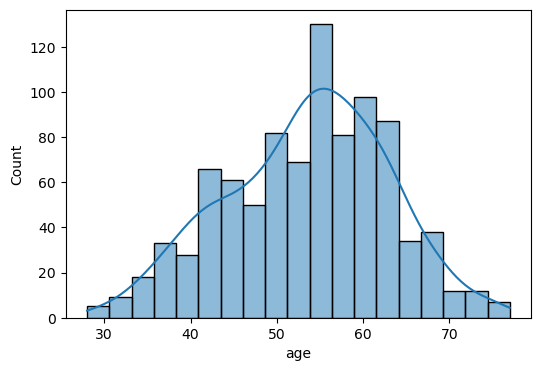

In [90]:
# make a histogram between age and sex
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='age', kde=True)


Mean: 53.51086956521739
Median: 54.0
Mode: 54


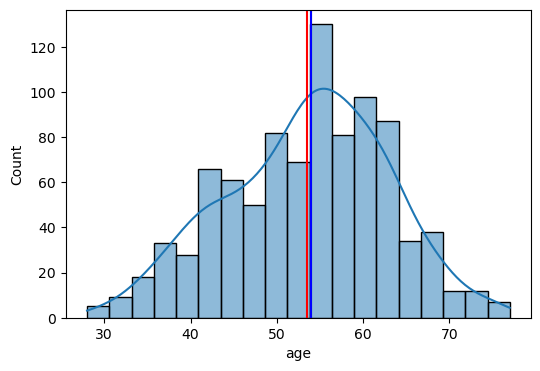

In [91]:
# plot the mean, median and mode of age column 
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='age', kde=True)
plt.axvline(df['age'].mean(), color='red', label='Mean')
plt.axvline(df['age'].median(), color='green', label='Median')
plt.axvline(df['age'].mode()[0], color='blue', label='Mode')

# print the value of mean, median and mode of age column
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])

In [92]:
# plot the histogram of age column using plotly and coloring it by sex column
fig = px.histogram(data_frame=df, x='age',color='sex')
fig.show()

In [93]:
# find the number of unique values in sex column
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [94]:
# calculate the percentages of male and females
male_count = 726
female_count = 194
total_count  = male_count + female_count

# calculate the percentage
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# print the results
print(f"Male percentage in the dataset: {male_percentage:.2f}%")
print(f"Female percentage in the dataset: {female_percentage:.2f}%")

# difference
difference_percentage = ((male_count - female_count)/female_count ) * 100
print(f"Difference in percentage: {difference_percentage:.2f}%")

Male percentage in the dataset: 78.91%
Female percentage in the dataset: 21.09%
Difference in percentage: 274.23%


In [95]:
# find the value count of age column by grouping by sex column
df.groupby('sex')['age'].value_counts() 

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [96]:
# lets deal with dataset column
# find the unique values in dataset column
df['dataset'].unique()  

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [97]:
# find unique values in the dataset column
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64

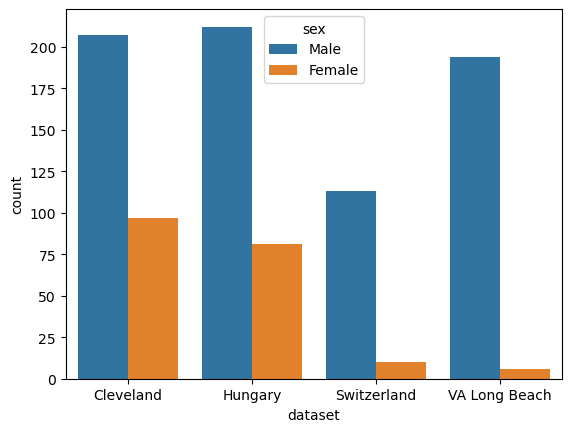

In [98]:
# plot the countplot of dataset column
sns.countplot(data=df, x='dataset', hue='sex')

# print the dataset column grouped by sex
df.groupby('sex')['dataset'].value_counts() 

In [99]:
# make a plot of age column using plotly and coloring this by dataset column
fig = px.histogram(data_frame=df, x='age', color='dataset')
fig.show()

# print the mean median and mode of age column grouped by dataset
print('Mean:', df.groupby('dataset')['age'].mean())
print("________________________________________________")
print('Median:', df.groupby('dataset')['age'].median())
print("________________________________________________")
print('Mode:', df.groupby('dataset')['age'].apply(lambda x: x.mode()[0]))

Mean: dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
________________________________________________
Median: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
________________________________________________
Mode: dataset
Cleveland        58
Hungary          54
Switzerland      61
VA Long Beach    62
Name: age, dtype: int64


In [100]:
# Let's sumarize the age column
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

In [101]:
# value count of cp column
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

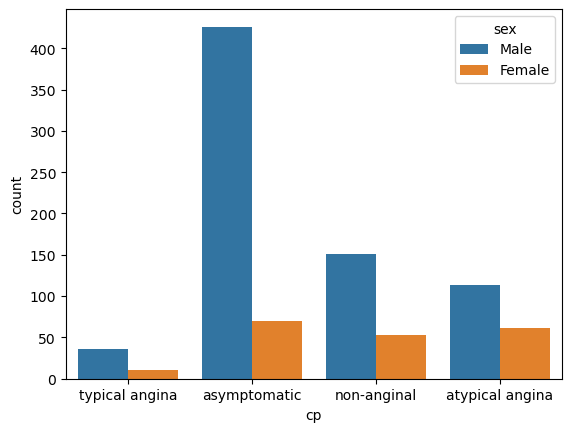

In [102]:
# countplot of cp column grouped by sex column
sns.countplot(data=df, x='cp', hue='sex')

<Axes: xlabel='cp', ylabel='count'>

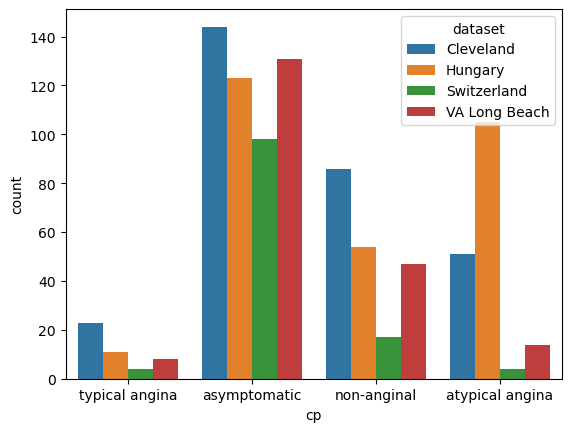

In [103]:
# countplot of cp column grouped by dataset column
sns.countplot(data=df, x='cp', hue='dataset')

In [104]:
# draw the plot of age column using plotly and coloring it by cp column
fig = px.histogram(data_frame=df, x='age', color='cp')
fig.show()

#### Let's explore the trestbps (resting blood pressure) column:
The normal resting blood pressure is 120/80 mm Hg.
- **Low Resting Blood Pressure (Hypotension)**: 
    - **Symptoms**: Dizziness, fainting, blurred vision, nausea, fatigue, lack of concentration.
    - **Potential Causes**: Dehydration, heart problems, endocrine problems, severe infection (septicemia), blood loss, lack of nutrients in your diet.
    - **Risks**: Severe hypotension can deprive your body of enough oxygen to carry out its functions, leading to damage to your heart and brain.

- **High Resting Blood Pressure (Hypertension)**:
    - **Symptoms**: Often asymptomatic, but can include headaches, shortness of breath, nosebleeds, flushing, dizziness, chest pain, visual changes, blood in urine.
    - **Potential Causes**: Stress, high salt intake, obesity, lack of physical activity, chronic kidney disease, adrenal and thyroid disorders, certain medications.
    - **Risks**: Persistent hypertension can lead to serious health problems, including heart disease, stroke, kidney damage, and vision loss.


In [105]:
# find the value counts of trestbps column
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

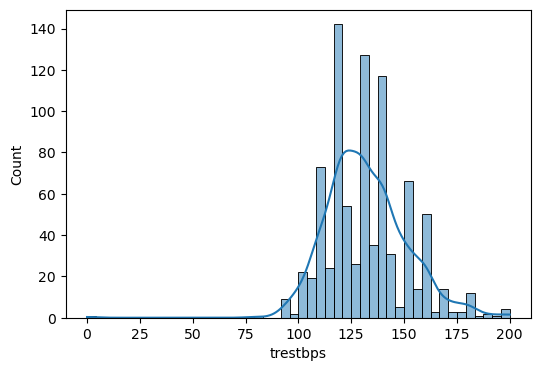

In [106]:
# create a histplot of trestbps column
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='trestbps', kde=True)

### Missing values imputation function using ML:

1. find the columns with missing values and store in an object
2. find the columns based on data type
   1. numeric
   2. Categoricals
   3. Boolean
3. Define the function to impute missing values
4. apply the function to our dataset with missing values
5. check the missing values after imputation

In [107]:
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols # here we made the list of columns which have missing values

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [108]:
# find only categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
# find only numerical columns
numeric_cols= df.select_dtypes(exclude='object').columns.tolist()

# we can also choose the columns which have boolean values if we want
# bool_cols = df.select_dtypes(include='bool').columns.tolist()

print(f'Categorical Columns: {categorical_cols}')
print(f'Numerical Columns: {numeric_cols}')
# then we can print the boolean columns if we want
# print(f'Boolean Columns: {bool_cols}')

Categorical Columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Numerical Columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


In [114]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [115]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", root_mean_squared_error(y_test, y_pred), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [116]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

ca         611
thal       486
slope      309
fbs         90
oldpeak     62
thalch      55
exang       55
restecg      2
dtype: int64

In [117]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 0.0%
MAE = 13.87183206521739 

RMSE = 17.492165837592466 

R2 = 0.001971398682436676 

Missing Values chol : 0.0%
MAE = 49.2796472826087 

RMSE = 68.89853477036745 

R2 = 0.5995835070514585 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 79.52 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 64.67 accuracy

Missing Values thalch : 5.98%
MAE = 16.66936416184971 

RMSE = 21.550589466610457 

R2 = 0.32468309545586904 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 80.35 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5596395348837209 

RMSE = 0.7844706628869129 

R2 = 0.4137115220043881 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 67.48 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 69.35 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 71.26 accuracy



In [118]:
df.isnull().sum()

Series([], dtype: int64)

### Output

1. People get heart disease after 28 years old
2. Most people gets it at the age of 53-54 years
3. Most of males and females get diagonse with heart disease at the age of 54-55
4. Male percentage in the dataset: 78.91%
5. Female percentage in the dataset: 21.09%
6. Difference in percentage: 274.23%
7. We have highest number of people from Cleveland which are 304 and loweset from Switzerland which are 123
   1. The highest number of females in this dataset are from Cleveland which are 97 and loweset in VA Long Beach which are 6
   2. The highest number of males in this dataset are from Cleveland which are 212 and loweset in VA Long Beach which are 113
8.  Mean Age by Dataset:
    - **Cleveland**: 54.35 years
    - **Hungary**: 47.89 years
    - **Switzerland**: 55.32 years
    - **VA Long Beach**: 59.35 years
  
9.  Median Age by Dataset:
    - **Cleveland**: 55.5 years
    - **Hungary**: 49.0 years
    - **Switzerland**: 56.0 years
    - **VA Long Beach**: 60.0 years

10. Mode Age by Dataset:
    - **Cleveland**: 58 years
    - **Hungary**: 54 years
    - **Switzerland**: 61 years
    - **VA Long Beach**: 62 years
11. 